# Building a new Employee Security System

### Problem Statement:
You, as the Security analyst, at Stark Industries, have been tasked to build a new contactless employee check-in system. You have come up with a new idea that uses the employees smartphone and machine learning to provide a contactless system where when an employee enters the firm’s territory, his or her smartphone connects to the server and transmits data from the employee smartphone sensor data like the accelerometer's data. The server performs the calculations and determines this person as
one of the employees using Gait analysis.


### Dataset:
Human Activity Recognition Using Smartphones Dataset
Link: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

## Importing Dependencies

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Extracting Features

In [143]:
features = list()

with open(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\features.txt', 'r') as f:
    for line in f:
        features.append(line.split()[1])

In [144]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

## Reading Train Data

In [145]:
train_df = pd.read_csv(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header = None)
train_df.columns = features
train_df['subject_id'] = pd.read_csv(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\train\subject_train.txt', header=None, squeeze=True)
train_df['activity'] = pd.read_csv(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\train\y_train.txt', header=None, squeeze=True)
activity = pd.read_csv(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\train\y_train.txt', header = None, squeeze = True)


In [146]:
train_df.shape

(7352, 563)

## Reading Test Data

In [147]:
test_df = pd.read_csv(r"C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\test\x_test.txt", delim_whitespace = True, header = None)
test_df.columns = features


test_df['subject_id'] = pd.read_csv(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\test\subject_test.txt', header=None, squeeze=True)

test_df['activity'] = pd.read_csv(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\test\y_test.txt', header=None, squeeze=True)

activity = pd.read_csv(r'C:\Users\Vishal Sahni\Desktop\Docu3c_Internship\Gait_Analysis\UCI HAR Dataset\test\y_test.txt', header=None, squeeze=True)


In [148]:
test_df.shape

(2947, 563)

## Merge train test data

In [149]:
df = pd.concat([train_df, test_df], axis=0)
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


## Data Cleaning

In [153]:
# checking null values
df.isnull().sum().sum()

0

In [154]:
df.isnull().sum().sum()

0

In [155]:
# checking duplicate values
df.duplicated().sum()

0

In [156]:
df.duplicated().sum()

0

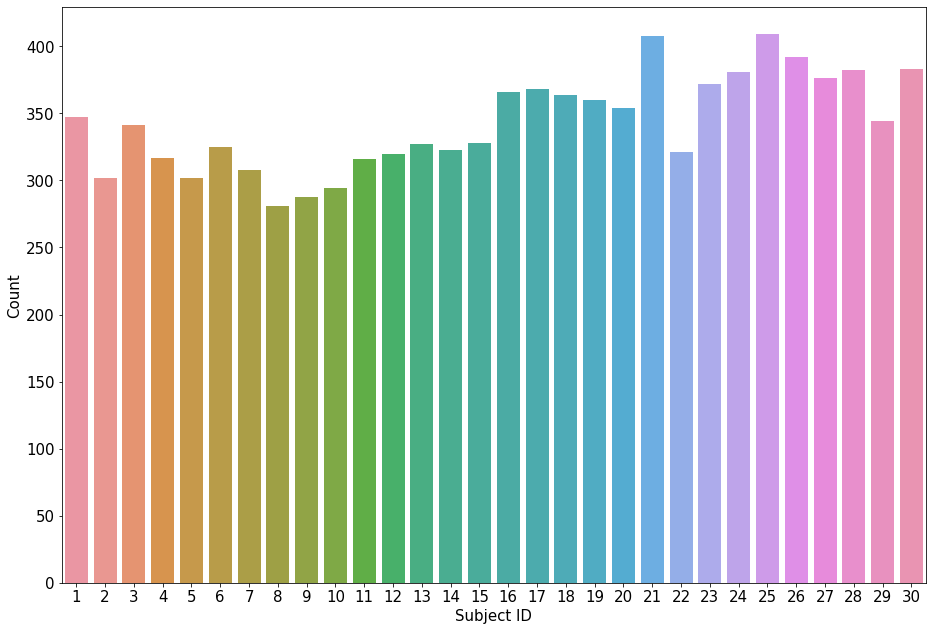

In [157]:
# checking for imbalance data

fig = plt.figure(figsize = (12, 8)) 
ax = fig.add_axes([0,0,1,1]) 
ax.set_title("", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject_id", data = df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

In [158]:
columns = df.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('-','')
columns = columns.str.replace(',','')

df.columns = columns

In [159]:
df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject_id', 'activity'],
      dtype='object', length=563)

In [160]:
df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


## Spliting Features and Labels

In [161]:
X = df.iloc[:,:-1]
y = df.iloc[:,-2]
y.unique()
# list(X.columns)

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30,  2,  4,  9, 10, 12, 13, 18, 20, 24], dtype=int64)

## Applying PCA

In [162]:
from sklearn.decomposition import PCA

# Apply PCA to the training and test data separately
pca = PCA(n_components=30) # Choosing 30 number of components to retain
df_pca = pca.fit_transform(df[list(df.columns[:-1])])

# Convert the PCA transformed data into a dataframe
X = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [163]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,14.366608,-7.504193,-0.431892,-1.406542,0.942814,1.799050,-0.152309,0.317954,0.780522,-0.949379,...,-0.299823,-0.636165,-0.081210,-0.651271,-0.061469,-0.219006,-0.173342,-0.258293,-0.483150,-0.827540
1,14.361692,-7.530496,-0.321092,-1.792943,0.633670,0.946287,0.262652,0.220621,-1.173044,-0.540293,...,-0.395613,0.061012,-0.173271,0.577016,0.068557,0.146023,-0.248581,-0.197173,-0.270416,0.092008
2,14.371884,-7.468873,-0.061655,-2.069359,0.725091,0.453707,-0.045361,-0.112949,0.097072,-0.064033,...,-0.573283,-0.051287,-0.483954,0.724826,-0.293331,0.208145,0.246279,-0.324070,-0.123071,-0.168998
3,14.348361,-7.654099,0.561100,-1.998237,0.307655,0.565709,-0.244189,0.365041,-1.195650,-0.071529,...,0.349999,0.239850,-0.079112,-0.029240,-0.048090,-0.435655,-0.329075,0.025158,0.070878,-0.220018
4,14.339467,-7.716510,0.775826,-2.184139,0.409095,0.407074,-0.147151,0.013096,-0.464684,0.127891,...,0.605197,0.246793,-0.224729,-0.219994,-0.137415,-0.240778,0.234626,0.246381,0.202872,0.294337


## train test split

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7209, 30)
(3090, 30)
(7209,)
(3090,)


## Applying Navie Bayes classification

In [165]:
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

In [166]:
from sklearn.preprocessing import StandardScaler

# Standardizing the Data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Naive Bayes test accuracy score:  0.7453074433656958
Naive Bayes train accuracy score:  0.7666805382161187


Text(69.0, 0.5, 'Truth')

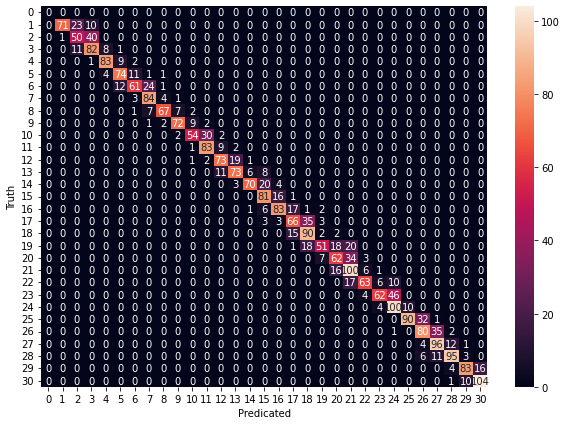

In [167]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf

nb= GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes test accuracy score: ",nb.score(x_test, y_test))
print("Naive Bayes train accuracy score: ",nb.score(x_train, y_train))

preds5 = nb.predict(x_test)
cm = tf.math.confusion_matrix(labels=y_test,predictions=preds5)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicated')
plt.ylabel('Truth')

## Applying logistic regression

logistic regression test accuracy score:  0.6815533980582524
logistic regression train accuracy score:  0.7118879178804273


Text(69.0, 0.5, 'Truth')

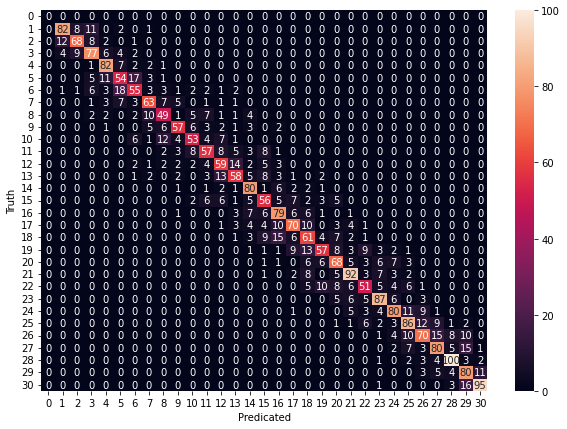

In [168]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)

print("logistic regression test accuracy score: ",model3.score(x_test, y_test))
print("logistic regression train accuracy score: ",model3.score(x_train, y_train))

preds3 = model3.predict(x_test)
cm = tf.math.confusion_matrix(labels=y_test,predictions=preds3)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicated')
plt.ylabel('Truth')

## Applying Gradient Boosting Classifier

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gbc = GradientBoostingClassifier(random_state=18)

# Train the model
gbc.fit(x_train, y_train)

# Evaluate the model on the test set
accuracy = gbc.score(x_test, y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

Test accuracy: 98.61%


GBC test accuracy score:  0.986084142394822
GBC train accuracy score:  1.0


Text(69.0, 0.5, 'Truth')

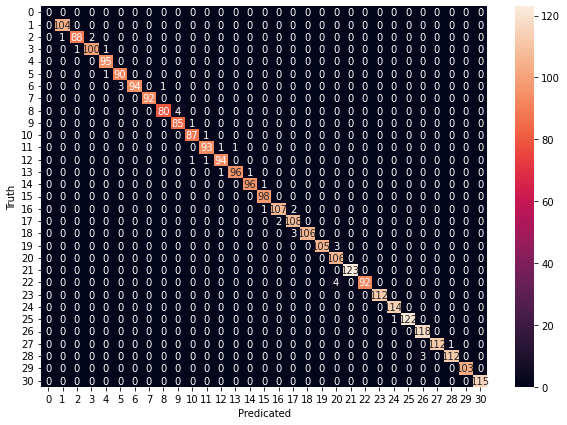

In [141]:
print("GBC test accuracy score: ",gbc.score(x_test, y_test))
print("GBC train accuracy score: ",gbc.score(x_train, y_train))

preds3 = gbc.predict(x_test)
cm = tf.math.confusion_matrix(labels=y_test,predictions=preds3)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicated')
plt.ylabel('Truth')